### Diseño de zapatas

In [1]:
from math import sqrt

"""********** Valores a ingresar por el usuario **********
*******************************************************"""

# Datos de las condiciones de servicio *************
# Fuerzas en kN. Momentos en kN-m. dimensiones en m.
P_serv = 200                   
Mx_serv = 25                   
My_serv = 25                   
ex_serv = Mx_serv/P_serv    # Excentricidad en x.     
ey_serv = My_serv/P_serv    # Excentricidad en y.     

# Datos de resistencia *****************************
# Fuerzas en kN. Momentos en kN-m. dimensiones en m.
P_ult = 57                    
Mx_ult = 0                    
My_ult = 0                    
ex_ult = Mx_ult/P_ult       # Excentricidad en x.      
ey_ult = My_ult/P_ult       # Excentricidad en y.      

# Datos geométricos de zapata y pedestal ***********
# Todos los datos son en metros.
Lx = 1.2                        
Ly = 1.2                        
h = 0.35                       
r = 0.08    # Recubrimiento al centroide                    
d = h - r                     
bx = 0.25
by = 0.25
perimetro = 2*(bx + d + by + d)

# Datos de los materiales **************************
# Todos en MPa
fy = 420        # Fluencia del acero       
fc = 21         # Resistencia del concreto      
q = 0.35        # Capacidad última del suelo 


""""********** Cálculos del programa **********************
********************************************************"""

# Esfuerzos en el suelo bajo condiciones de servicio
axi = (P_serv/1000)/(Lx*Ly)    # En MPa
esfuerzo = [round(axi*(1 + 6*ex_serv/Lx + 6*ey_serv/Ly), 4), round(axi*(1 + 6*ex_serv/Lx - 6*ey_serv/Ly), 4),
           round(axi*(1 - 6*ex_serv/Lx - 6*ey_serv/Ly), 4), round(axi*(1 - 6*ex_serv/Lx + 6*ey_serv/Ly), 4)]   # En MPa

# Comprobación de los esfuerzos en el suelo **********
idx = 0
mensaje1 = ''
while idx < 4:
    if esfuerzo[idx] < q:
        mensaje1 = 'NO se excede la capacidad última del suelo:'
    else:
        mensaje1 = '¡¡SÍ se excede la capacidad última del suelo!!'
        break
    idx = idx + 1

print(mensaje1)
print('    Los esfuerzos en las 4 esquinas de la zapata son: ', esfuerzo, 'MPa\n')

# Comprobación de volcamiento de la zapata ***********
idx = 0
mensaje2 = ''
while idx < 4:
    if esfuerzo[idx] >= 0:
        mensaje2 = 'NO hay levantamiento de la zapata\n'
    else:
        mensaje2 = '¡¡SÍ hay levantamiento de la zapata!!\n'
        break
    idx = idx + 1

print(mensaje2)


"""********** Diseño estructural de la zapata *************
********************************************************"""

# Esfuerzo en el suelo bajo cargas últimas (Para el diseño de la zapata)
axi2 = (P_ult/1000)/(Lx*Ly)   # En MPa
esfuerzo_ult = [axi2*(1 + 6*ex_ult/Lx + 6*ey_ult/Ly), axi2*(1 + 6*ex_ult/Lx - 6*ey_ult/Ly),
           axi2*(1 - 6*ex_ult/Lx - 6*ey_ult/Ly), axi2*(1 - 6*ex_ult/Lx + 6*ey_ult/Ly)]   # En MPa

phi, alpha, beta = 0.75, 40, bx/by
q_medio = sum(esfuerzo_ult)/4   # En MPa
c = phi*perimetro*d*sqrt(fc)    # En sqrt(f'c), f'c se usa en MPa. Los resultados dan en kN

# Comprobación del punzonamiento ***************************************
corte_max = [0.17*(1 + 2/beta)*c, 0.083*(alpha*d/perimetro + 2)*c, 0.33*c]   # ¡¡Resultado en MN!!
v1 = q_medio*(Lx*Ly - (bx + d)*(by + d))    # En MN

idx = 0
mensaje3 = ''
while idx < 3:
    if v1 < corte_max[idx]:
        mensaje3 = 'NO FALLA por punzonamiento. La zapata cumple:'
    else:
        mensaje3 = '¡¡FALLA por punzonamiento. La zapata NO cumple!!'
        break
    idx = idx + 1

print(mensaje3)
print('    La zapata resiste ', round(min(corte_max), 4), 'MN' '. La columna transmite ',
      round(v1, 4), 'MN\n')

# comprobación de cortante unidireccional ******************************
v2 = [q_medio*Ly*((Lx-bx)/2 - d), q_medio*Lx*((Ly - by)/2 - d)]   # ¡¡Resultado en MN!!

if v2[0] >= phi*0.17*Ly*d*sqrt(fc):            # phi*0.17*Ly*d*sqrt(fc) da resultado en MN
    print('NO CUMPLE cortante en la cara X\n')
else:
    print('SÍ CUMPLE cortante en la cara X:')
    print('    Cortante en la cara X = ', round(v2[0], 4), 'MN.', ' La cara X resiste ',
          round(phi*0.17*Ly*d*sqrt(fc), 4), 'MN\n')
    
if v2[1] >= phi*0.17*Lx*d*sqrt(fc):            # phi*0.17*Lx*d*sqrt(fc) da resultado en MN
    print('NO CUMPLE cortante en la cara Y\n')
else:
    print('SÍ CUMPLE cortante en la cara Y:')
    print('    Cortante en la cara X = ', round(v2[1], 4), 'MN.', ' La cara X resiste ',
          round(phi*0.17*Lx*d*sqrt(fc), 4), 'MN\n')
    
# Refuerzo a flexión ***************************************************
Mu = [q_medio*((Lx/2 - bx/2)**2)*Ly/2, q_medio*((Ly/2 - by/2)**2)*Lx/2]   # ¡¡Resultado em MN-m!!

# Cuantía en la cara x
Rnx = (Mu[0])/(0.9*Ly*d**2)
Bx = 2*Rnx/(0.85*fc)
if (Bx >= 1):
    print('Revisar el valor de Mu[0]\n')
else:
    rho_x = round((0.85*fc/fy)*(1 - sqrt(1 - Bx)), 6)
    A_x = round(rho_x*Ly*d*1000**2, 2)

# Cuantía en la cara y    
Rny = (Mu[1])/(0.9*Lx*d**2)
By = 2*Rny/(0.85*fc)
if (By >= 1):
    print('Revisar el valor de Mu[1]\n')
else:
    rho_y = round((0.85*fc/fy)*(1 - sqrt(1 - By)), 6)
    A_y = round(rho_y*Lx*d*1000**2, 2)

print('La cuantía de acero en la cara X es ', rho_x, ':')
print('    El área de refuerzo a flexión en la cara X es', A_x, 'mm^2\n')
print('La cuantía de acero en la cara Y es ', rho_y, ':')
print('    El área de refuerzo a flexión en la cara Y es', A_y, 'mm^2')

NO se excede la capacidad última del suelo:
    Los esfuerzos en las 4 esquinas de la zapata son:  [0.3125, 0.1389, -0.0347, 0.1389] MPa

¡¡SÍ hay levantamiento de la zapata!!

NO FALLA por punzonamiento. La zapata cumple:
    La zapata resiste  0.637 MN. La columna transmite  0.0463 MN

SÍ CUMPLE cortante en la cara X:
    Cortante en la cara X =  0.0097 MN.  La cara X resiste  0.1893 MN

SÍ CUMPLE cortante en la cara Y:
    Cortante en la cara X =  0.0097 MN.  La cara X resiste  0.1893 MN

La cuantía de acero en la cara X es  0.000162 :
    El área de refuerzo a flexión en la cara X es 52.49 mm^2

La cuantía de acero en la cara Y es  0.000162 :
    El área de refuerzo a flexión en la cara Y es 52.49 mm^2


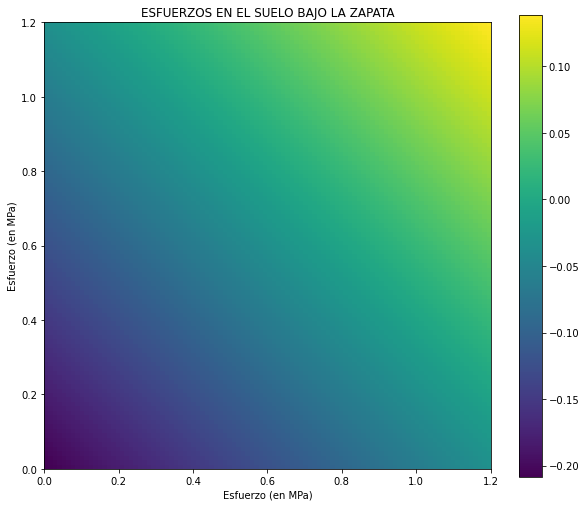

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a, b, c = (esfuerzo[1] - esfuerzo[2])/Lx, (esfuerzo[3] - esfuerzo[2])/Ly, esfuerzo[2]
x, y = np.linspace(0, Lx, 100), np.linspace(0, Ly, 100)
X, Y = np.meshgrid(x, y)
Z = a*X - b*Y + c
    

"""
fig = plt.figure()
ax = fig.add_subplot(111)

#x = y = np.linspace(0, Lx, 100)
#X,Y = np.meshgrid(x,y)
#Z = (-4*X)/(X**2 + Y**2 + 1)

cs = ax.contour(X,Y,Z)
plt.show()
print(Z)
print(esf)

N=M=200
x, y = np.ogrid[0:20:N*1j, 0:20:M*10]
data = np.sin(np.pi*x*2/20)*np.cos(np.pi*y*2/20)"""

fig, ax1 = plt.subplots(1, figsize=(10,10))
im = ax1.imshow(Z, extent=[0,Lx,0,Ly])
fig.colorbar(im, ax=ax1, shrink=0.85)
plt.title('ESFUERZOS EN EL SUELO BAJO LA ZAPATA')
plt.xlabel('Esfuerzo (en MPa)')
plt.ylabel('Esfuerzo (en MPa)')
plt.plot;

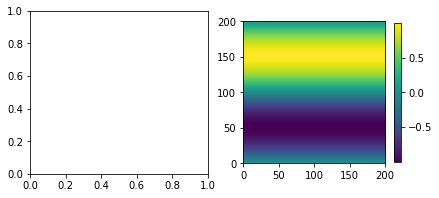

In [8]:
# Ensayos de graficación. Ignorar esta parte

import matplotlib.pyplot as plt
import numpy as np

N=M=200
x, y = np.ogrid[0:20:N*1j, 0:20:M*10]
data = np.sin(np.pi*x*2/20)*np.cos(np.pi*y*2/20)

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(7,3))
im = ax1.imshow(data, extent=[0,200,0,200])
fig.colorbar(im, ax=ax1, shrink=0.85)